# HOUSING MARKET PRICE REGRESSION ANALYSIS

In [113]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from IPython.display import Image, display

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading & Exploration

In [114]:
# Read data into a DataFrame
data = pd.read_csv("updated_house_data.csv")

In [115]:
# Display first five rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice Category
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Expensive
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Average Price
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Expensive
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Average Price
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Expensive


In [116]:
print(f"Dataset shape: {data.shape}")
print(f"Total houses: {data.shape[0]:,}")
print(f"Total features: {data.shape[1]}")

Dataset shape: (1460, 82)
Total houses: 1,460
Total features: 82


In [117]:
# Display columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [118]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   MSZoning            1460 non-null   object 
 3   LotFrontage         1201 non-null   float64
 4   LotArea             1460 non-null   int64  
 5   Street              1460 non-null   object 
 6   Alley               91 non-null     object 
 7   LotShape            1460 non-null   object 
 8   LandContour         1460 non-null   object 
 9   Utilities           1460 non-null   object 
 10  LotConfig           1460 non-null   object 
 11  LandSlope           1460 non-null   object 
 12  Neighborhood        1460 non-null   object 
 13  Condition1          1460 non-null   object 
 14  Condition2          1460 non-null   object 
 15  BldgType            1460 non-null   object 
 16  HouseS

## Data Imputation
- Data Imputation is the process of handling (filling) missing values in a dataset so that it can be analysed with limited error or bias. Instead of deleting those missing values, they can be filled with estimates based on patters in the dataset.

In [119]:
# Filter for missing values
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Count total features with missing values
total_missing = (missing > 0).sum()

print(missing)
print(f"\n Total number of features with missing values: {total_missing}")

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

 Total number of features with missing values: 19


In [120]:
# Drop sparse features
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

Different data types require different imputation strategies. Categorical features often represent labels or groups, while numerical features represent quantities. Therefore, it's important to distinguish between them to apply the most appropriate imputation method.
- Numerical features are commonly imputed with statistical measures like mean or median.
- Categorical features are better imputed using mode or a placeholder like `None`

In [121]:
# Filter categorical features with missing values
cat_features = data.select_dtypes(include=['object']).columns
missing_cat = data[cat_features].isnull().sum()
missing_cat = missing_cat[missing_cat > 0]

# Count total categorical features with missing values
total_missing_cat = (missing_cat > 0).sum()

print("Categorical Features with Missing Values:")
print(missing_cat)
print(f"\n Total number of categorical features with missing values: {total_missing_cat}")

Categorical Features with Missing Values:
MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

 Total number of categorical features with missing values: 12


In [122]:
# Impute categorical features, missing = None
cols_none = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 
             'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 
             'BsmtExposure', 'BsmtCond', 'BsmtQual']
data[cols_none] = data[cols_none].fillna('None')

# Fill singular missing `Electrical` value with mode
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

In [123]:
# Confirm imputation
missing_cat = data[cat_features].isnull().sum()
missing_cat = missing_cat[missing_cat > 0]
total_missing_cat = (missing_cat > 0).sum()

print(f"\n Total number of categorical features with missing values: {total_missing_cat}")


 Total number of categorical features with missing values: 0


In [124]:
# Filter numerical features with missing values
num_features = data.select_dtypes(include=['int64', 'float64']).columns
missing_num = data[num_features].isnull().sum()
missing_num = missing_num[missing_num > 0]

# Count total features with missing values
total_missing_num = (missing_num > 0).sum()

print("Numerical Features with Missing Values:")
print(missing_num)
print(f"\n Total number of missing numerical features: {total_missing_num}")

Numerical Features with Missing Values:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

 Total number of missing numerical features: 3


In [125]:
# Impute missing LotFrontage values using the median value of each Neighborhood group
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# If MnsVnrType is None, set MasVnrArea to 0
data.loc[(data['MasVnrType'] == 'None') & (data['MasVnrArea'].isnull()), 'MasVnrArea'] = 0

# Otherwise, fill remainder with median
median_area = data.loc[data['MasVnrArea'] > 0, 'MasVnrArea'].median()
data['MasVnrArea'].fillna(median_area, inplace=True)

# If GarageType is 'None', set GarageYrBlt to 0
data.loc[(data['GarageType'] == 'None') & (data['GarageYrBlt'].isnull()), 'GarageYrBlt'] = 0

# Otherwise, fill missing GarageYrBlt with YearBuilt
data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)


- `LotFrontage` was filled using the median value within each neighborhood, ensuring that imputed values reflect local lot size patterns rather than a global average.

- `MasVnrArea` was set to 0 for homes with no masonry veneer (`MasVnrType` == 'None'), and the remaining missing values were filled with the median of non-zero entries to maintain realistic estimates.

- `GarageYrBlt` was set to 0 for homes without a garage (`GarageType` == 'None'), while other missing values were filled using the house’s YearBuilt, assuming the garage was constructed at the same time.

In [126]:
# Get basic data statistics
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Target Variable Analysis

SALEPRICE ANALYSIS

Valid SalePrice records: 1,460
Average price: $180,921
Median price: $163,000
Price range: $34,900 - $755,000



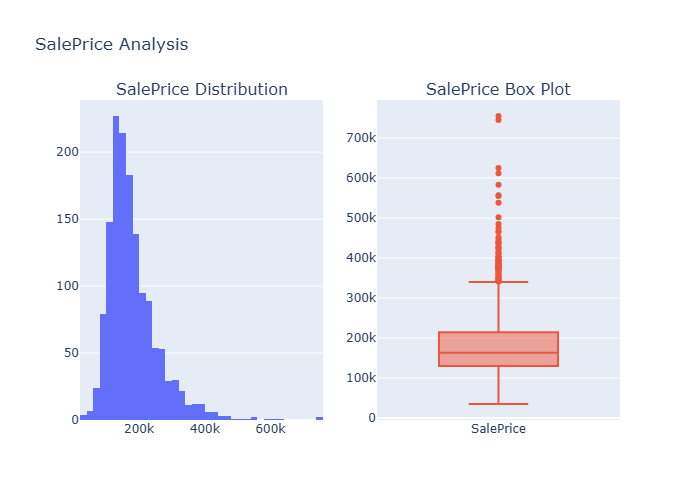

In [127]:
# Analyse the target variable
if 'SalePrice' in data.columns:
    print("SALEPRICE ANALYSIS")

    # Remove any missing SalePrice values
    data_clean = data.dropna(subset=['SalePrice'])

    print(f"\nValid SalePrice records: {len(data_clean):,}")
    print(f"Average price: ${data_clean['SalePrice'].mean():,.0f}")
    print(f"Median price: ${data_clean['SalePrice'].median():,.0f}")
    print(f"Price range: ${data_clean['SalePrice'].min():,.0f} - ${data_clean['SalePrice'].max():,.0f}\n")

    # Visualize SalePrice distribution
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=['SalePrice Distribution', 'SalePrice Box Plot'])

    # Histogram
    fig.add_trace(
        go.Histogram(x=data_clean['SalePrice'], nbinsx=50, name='SalePrice'),
        row=1, col=1
    )

    # Box plot
    fig.add_trace(
        go.Box(y=data_clean['SalePrice'], name='SalePrice'),
        row=1, col=2
    )

    fig.update_layout(height=400, title_text="SalePrice Analysis", showlegend=False)
    
    # Save as PNG
    fig.write_image("saleprice_analysis.png")
    display(Image(filename="saleprice_analysis.png"))
    
    fig.show()

else:
    print("SalePrice column not found in dataset!")

> ⚠️ Note: Plots may appear twice when run locally—once as a static image for GitHub rendering, and once as an interactive Plotly chart.

## Feature Engineering
- `TotalSF` represents the entire livable and usable square footage of the house
- `AgeatSale` represents how old the house is at the time of the sale. Newer homes might sell for more.
- `RemodelAdd` shows how recently the house was remodeled. A remodeledhouse might be more valuable.
- `BathScore` represents a weighted score of bathroom utility. Half baths are not as valuable as full baths.

In [128]:
# Create engineered features
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['GrLivArea']
data['AgeAtSale'] = data['YrSold'] - data['YearBuilt']
data['RemodelAge'] = data['YrSold'] - data['YearRemodAdd']
data['BathScore'] = (
    data['FullBath'] +
    0.5 * data['HalfBath'] +
    data['BsmtFullBath'] +
    0.5 * data['BsmtHalfBath']
)

## Feature Correlation Analysis

In [129]:
# Get numeric columns only
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create correlation heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=correlation_matrix.round(3).values,
    texttemplate='%{text}',
    textfont={"size": 8},
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title='Feature Correlation Matrix',
    width=800,
    height=800,
    xaxis_title="Features",
    yaxis_title="Features"
)

# Save as PNG
fig.write_image("correlation_matrix.png")

fig.show()

# Show top correlations with SalePrice
if 'SalePrice' in correlation_matrix.columns:
    price_correlations = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
    print("\nTOP 10 FEATURES CORRELATED WITH SALEPRICE:")
    print("-" * 50)

    for i, (feature, corr) in enumerate(price_correlations.head(10).items(), 1):
        if feature != 'SalePrice':
            strength = "Very Strong" if abs(corr) >= 0.8 else "Strong" if abs(corr) >= 0.6 else "Moderate" if abs(corr) >= 0.4 else "Weak"
            print(f"{i:2d}. {feature:<20} | {corr:6.3f} | {strength}")


TOP 10 FEATURES CORRELATED WITH SALEPRICE:
--------------------------------------------------
 2. OverallQual          |  0.791 | Strong
 3. TotalSF              |  0.758 | Strong
 4. GrLivArea            |  0.709 | Strong
 5. GarageCars           |  0.640 | Strong
 6. BathScore            |  0.632 | Strong
 7. GarageArea           |  0.623 | Strong
 8. TotalBsmtSF          |  0.614 | Strong
 9. 1stFlrSF             |  0.606 | Strong
10. FullBath             |  0.561 | Moderate


## Feature Selection

In [130]:
# Select features most correlated with SalePrice
if 'SalePrice' in correlation_matrix.columns:
    price_corr = correlation_matrix['SalePrice'].drop('SalePrice')
    top_features = price_corr.abs().sort_values(ascending=False).head(5)

    print("\nTOP 5 FEATURES MOST CORRELATED WITH SalePrice:")
    for i, (feature, corr) in enumerate(top_features.items(), start=1):
        strength = "Strong" if corr > 0.6 else "Moderate" if corr > 0.5 else "Weak"
        print(f"{i}. {feature:<20} | {corr:.3f} | {strength}")

    selected_features = top_features.index.tolist()
else:
    print("Cannot find SalePrice column for analysis")



TOP 5 FEATURES MOST CORRELATED WITH SalePrice:
1. OverallQual          | 0.791 | Strong
2. TotalSF              | 0.758 | Strong
3. GrLivArea            | 0.709 | Strong
4. GarageCars           | 0.640 | Strong
5. BathScore            | 0.632 | Strong


## Feature Visualisation

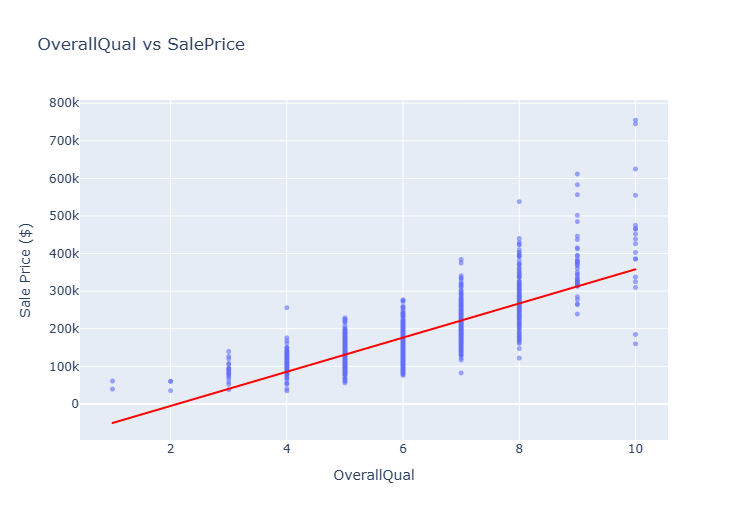


Relationship: OverallQual vs SalePrice
Data points: 1,460
Correlation: 0.791


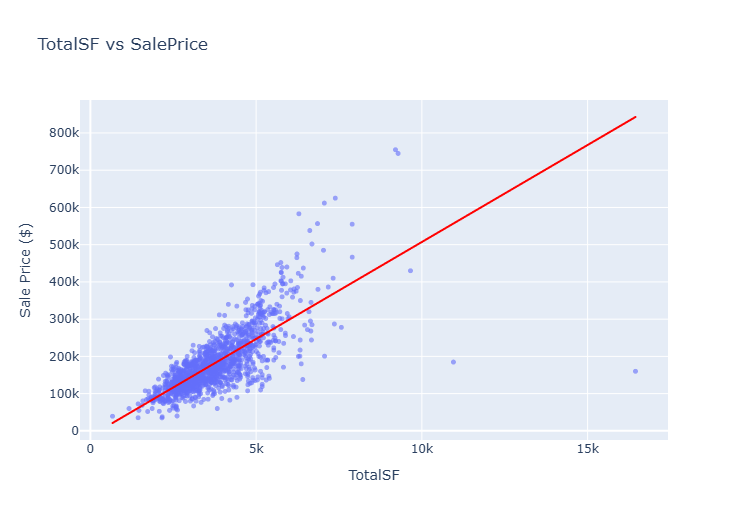


Relationship: TotalSF vs SalePrice
Data points: 1,460
Correlation: 0.758


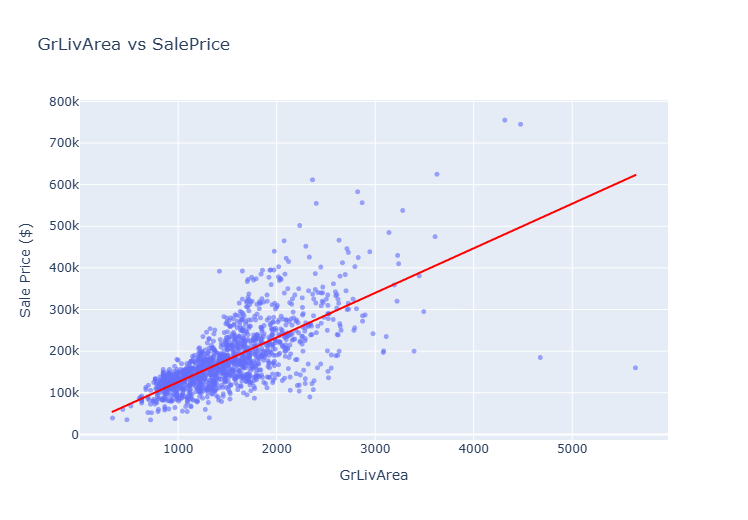


Relationship: GrLivArea vs SalePrice
Data points: 1,460
Correlation: 0.709


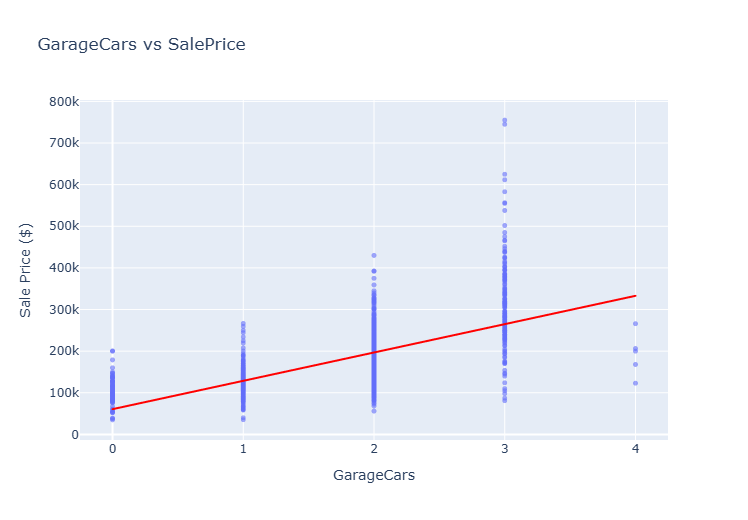


Relationship: GarageCars vs SalePrice
Data points: 1,460
Correlation: 0.640


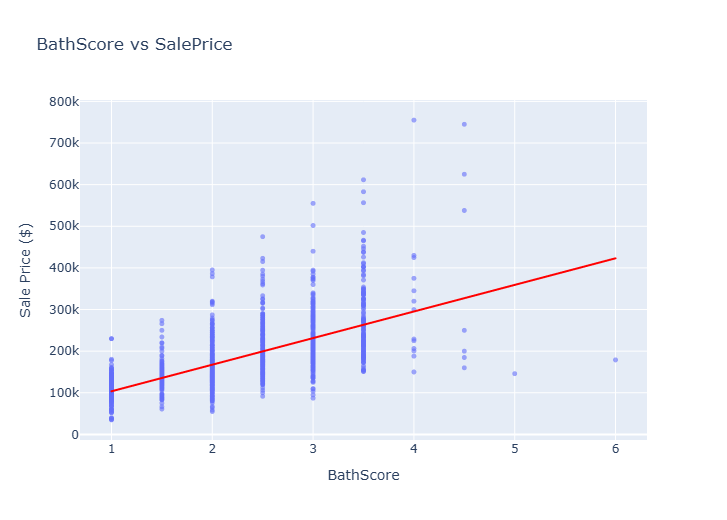


Relationship: BathScore vs SalePrice
Data points: 1,460
Correlation: 0.632


In [131]:
# Visualise selected features
for feature in selected_features:
    clean_data = data.dropna(subset=['SalePrice', feature])

    fig = px.scatter(
        clean_data,
        x=feature,
        y='SalePrice',
        title=f'{feature} vs SalePrice',
        labels={feature: feature, 'SalePrice': 'Sale Price ($)'},
        trendline="ols",
        trendline_color_override="red"
    )

    fig.update_traces(marker=dict(size=5, opacity=0.6))
    fig.update_layout(height=500, width=800)
    
    # Save as PNG
    filename = f"{feature}_vs_SalePrice.png"
    fig.write_image(filename)
    
    fig.show()

    print(f"\nRelationship: {feature} vs SalePrice")
    print(f"Data points: {len(clean_data):,}")
    print(f"Correlation: {price_corr[feature]:.3f}")

## Data Preparation

In [132]:
# Prepare the data for modeling
X = clean_data[selected_features]
y = clean_data['SalePrice']

print(f"Features (X): {selected_features}")
print(f"Target (y): SalePrice")
print(f"Total samples: {len(X):,}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train):,}")
print(f"Testing samples: {len(X_test):,}")

# Display data info
print("\nFeature statistics:")
for feature in selected_features:
    print(f"'{feature}':")
    print(f"   Range: {X[feature].min():.0f} - {X[feature].max():.0f}")
    print(f"   Mean: {X[feature].mean():.2f}")
    print(f"   Std: {X[feature].std():.2f}\n")

print(f"\nSalePrice statistics:")
print(f"   Range: ${y.min():,.0f} - ${y.max():,.0f}")
print(f"   Mean: ${y.mean():,.0f}")
print(f"   Std: ${y.std():,.0f}")

Features (X): ['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'BathScore']
Target (y): SalePrice
Total samples: 1,460
Training samples: 1,168
Testing samples: 292

Feature statistics:
'OverallQual':
   Range: 1 - 10
   Mean: 6.10
   Std: 1.38

'TotalSF':
   Range: 668 - 16444
   Mean: 3735.52
   Std: 1155.73

'GrLivArea':
   Range: 334 - 5642
   Mean: 1515.46
   Std: 525.48

'GarageCars':
   Range: 0 - 4
   Mean: 1.77
   Std: 0.75

'BathScore':
   Range: 1 - 6
   Mean: 2.21
   Std: 0.79


SalePrice statistics:
   Range: $34,900 - $755,000
   Mean: $180,921
   Std: $79,443


## Model Training

In [133]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train models and store results
model_results = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Store results
    model_results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'mse': test_mse,
        'rmse': test_rmse,
        'mae': test_mae,
        'y_test_pred': y_test_pred
    }

    print(f"   R² Score: {test_r2:.4f}")
    print(f"   RMSE: ${test_rmse:,.0f}")

print("\nAll models trained successfully!")

Training Linear Regression...
   R² Score: 0.7932
   RMSE: $39,824
Training Ridge Regression...
   R² Score: 0.7933
   RMSE: $39,821
Training Lasso Regression...
   R² Score: 0.7932
   RMSE: $39,824
Training Random Forest...
   R² Score: 0.8826
   RMSE: $30,011

All models trained successfully!


## Model Performance Comparison

In [134]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'R² Score': [results['test_r2'] for results in model_results.values()],
    'RMSE': [results['rmse'] for results in model_results.values()],
    'MAE': [results['mae'] for results in model_results.values()],
    'Train R²': [results['train_r2'] for results in model_results.values()]
})

# Add overfitting metric
comparison_df['Overfitting'] = comparison_df['Train R²'] - comparison_df['R² Score']

# Sort by R² score
comparison_df = comparison_df.sort_values('R² Score', ascending=False)

print("PERFORMANCE RANKING:")
print("-" * 80)
for i, row in comparison_df.iterrows():
    print(f"{row.name + 1}. {row['Model']:<18} | R²: {row['R² Score']:.4f} | RMSE: ${row['RMSE']:>8,.0f} | MAE: ${row['MAE']:>8,.0f}")

# Display the comparison table
print(f"\nDETAILED COMPARISON:")
display(comparison_df.round(4))

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_results = model_results[best_model_name]

print(f"\nBEST MODEL: {best_model_name}")
print(f"   Test R² Score: {best_model_results['test_r2']:.4f}")
print(f"   RMSE: ${best_model_results['rmse']:,.0f}")
print(f"   Explains {best_model_results['test_r2']*100:.1f}% of price variation")

PERFORMANCE RANKING:
--------------------------------------------------------------------------------
4. Random Forest      | R²: 0.8826 | RMSE: $  30,011 | MAE: $  20,052
2. Ridge Regression   | R²: 0.7933 | RMSE: $  39,821 | MAE: $  25,257
3. Lasso Regression   | R²: 0.7932 | RMSE: $  39,824 | MAE: $  25,261
1. Linear Regression  | R²: 0.7932 | RMSE: $  39,824 | MAE: $  25,261

DETAILED COMPARISON:


,Model,R² Score,RMSE,MAE,Train R²,Overfitting
3,Random Forest,0.8826,30011.3092,20052.3188,0.9728,0.0903
1,Ridge Regression,0.7933,39821.1685,25256.6735,0.7627,-0.0305
2,Lasso Regression,0.7932,39824.0926,25261.1626,0.7627,-0.0305
0,Linear Regression,0.7932,39824.3288,25261.4979,0.7627,-0.0305



BEST MODEL: Random Forest
   Test R² Score: 0.8826
   RMSE: $30,011
   Explains 88.3% of price variation


## Performance Metric Visualisation

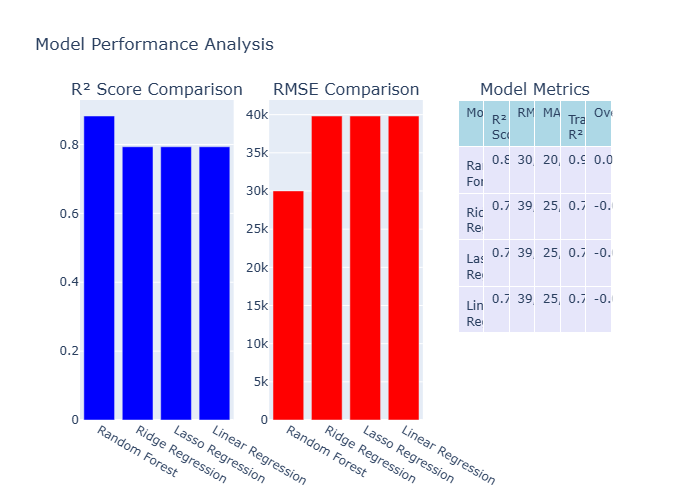

In [135]:
# Create performance comparison chart
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=['R² Score Comparison', 'RMSE Comparison', 'Model Metrics'],
    specs=[[{}, {}, {"type": "table"}]]
)

# R² Score comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['R² Score'],
        name='R² Score',
        marker_color='blue'
    ),
    row=1, col=1
)

# RMSE comparison
fig.add_trace(
    go.Bar(
        x=comparison_df['Model'],
        y=comparison_df['RMSE'],
        name='RMSE',
        marker_color='red'
    ),
    row=1, col=2
)

# Metrics table
fig.add_trace(
    go.Table(
        header=dict(values=list(comparison_df.columns),
                   fill_color='lightblue',
                   align='left'),
        cells=dict(values=[comparison_df[col] for col in comparison_df.columns],
                  fill_color='lavender',
                  align='left',
                  format=[None, '.4f', ',.0f', ',.0f', '.4f', '.4f'])
    ),
    row=1, col=3
)

fig.update_layout(height=500, title_text="Model Performance Analysis", showlegend=False)

# Save as PNG
fig.write_image("model_performance_comparison.png")
display(Image(filename="model_performance_comparison.png"))

fig.show()

## Best Model Visualisation

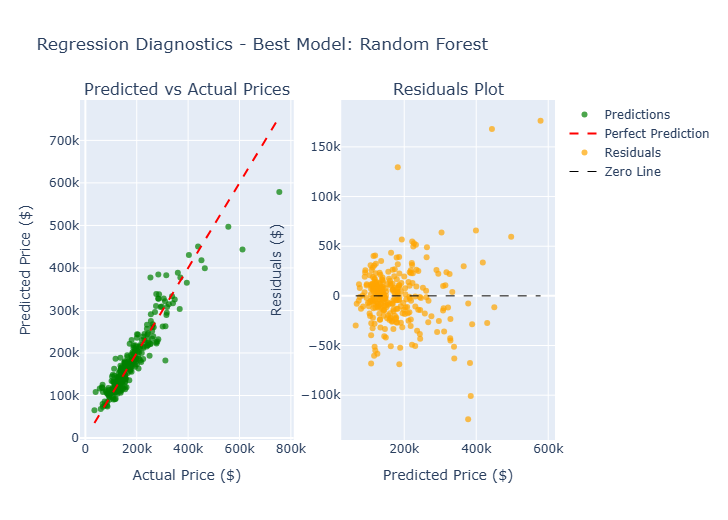

In [138]:
# Get best model and predictions
best_model = model_results[best_model_name]['model']
y_pred_best = model_results[best_model_name]['y_test_pred']

# Create subplot layout
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        'Predicted vs Actual Prices',
        'Residuals Plot'
    ]
)

# Predicted vs Actual
fig.add_trace(
    go.Scatter(
        x=y_test,
        y=y_pred_best,
        mode='markers',
        name='Predictions',
        marker=dict(color='green', size=6, opacity=0.7)
    ),
    row=1, col=1
)

# Perfect prediction line
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
fig.add_trace(
    go.Scatter(
        x=[min_val, max_val],
        y=[min_val, max_val],
        mode='lines',
        name='Perfect Prediction',
        line=dict(color='red', dash='dash', width=2)
    ),
    row=1, col=1
)

# Residuals plot
residuals = y_test - y_pred_best
fig.add_trace(
    go.Scatter(
        x=y_pred_best,
        y=residuals,
        mode='markers',
        name='Residuals',
        marker=dict(color='orange', size=6, opacity=0.7)
    ),
    row=1, col=2
)

# Zero line for residuals
fig.add_trace(
    go.Scatter(
        x=[y_pred_best.min(), y_pred_best.max()],
        y=[0, 0],
        mode='lines',
        name='Zero Line',
        line=dict(color='black', dash='dash', width=1)
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=1000,
    title_text=f"Regression Diagnostics - Best Model: {best_model_name}",
    showlegend=True
)

# Axis labels
fig.update_xaxes(title_text="Actual Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Predicted Price ($)", row=1, col=1)
fig.update_xaxes(title_text="Predicted Price ($)", row=1, col=2)
fig.update_yaxes(title_text="Residuals ($)", row=1, col=2)

# Save as PNG
fig.write_image("random_forest_diagnostics.png")

fig.show()

## Analysis Summary

The Random Forest model delivered the strongest performance out of the four tested models (Linear, Ridge, Lasso, Random Forest), using five features:

- R² Score (Test Set): 0.8826 → explains ~88% of variance in house prices.

-  RMSE: $30,011 → about 16.8% of the mean house price (~178k)

- MAE: $20,052 → typical prediction error per house.

- Train R²: 0.9728 vs. Test R²: 0.8826 → gap of 0.09 indicates mild overfitting, but still generalizes well.

**Model Comparison:**

- Linear, Ridge, Lasso all plateaued at ~0.793 R² and ~$39.8k RMSE, showing little gain from regularization.

- Random Forest outperformed significantly (R² +0.09, RMSE reduced by ~$10k).

**Residuals & Error Patterns:**

- Predicted vs. Actual: strong alignment, but the model tends to underestimate very high-priced houses.

- Residuals: centered around zero but spread widens at higher prices → sign of heteroscedasticity (errors increase for expensive homes).

- No strong systematic bias apart from extremes.

**Interpretation:**

- Random Forest was able to capture non-linearities and feature interactions across the selected predictors, unlike linear-based models that flattened performance.

**Next Steps:**

- Investigate residual outliers → which house categories are consistently mispredicted?

- Add more predictors to improve coverage of variance.